In [1]:
import cv2
import time
import matplotlib.pyplot as plt
from deepface import DeepFace
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import numpy as np


Image captured successfully!
Image shape: (480, 640, 3)


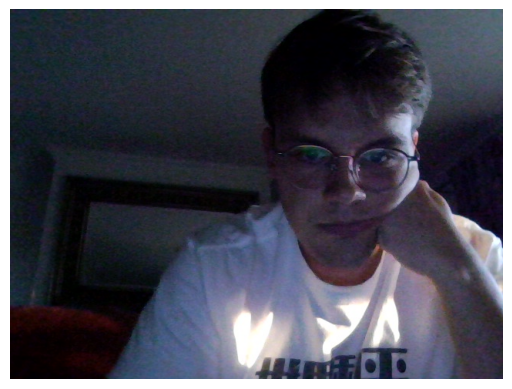

In [7]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise Exception("Could not open video device")

# Read and discard some frames so auto-exposure adjusts
for i in range(5):  # adjust the number as needed
    ret, frame = cap.read()
# Capture one frame (this one should be adjusted)
ret, frame = cap.read()
cap.release()

# 'frame' now holds the picture as a NumPy array
if ret:
    print("Image captured successfully!")
    print("Image shape:", frame.shape)
    cv2.imwrite("captured_image.jpg", frame)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis("off")
    plt.show()
else:
    print("Failed to capture image.")

In [8]:
import datetime
now = datetime.datetime.now()
time_str = now.time().strftime("%H_%M_%S")
time_str

'18_46_01'

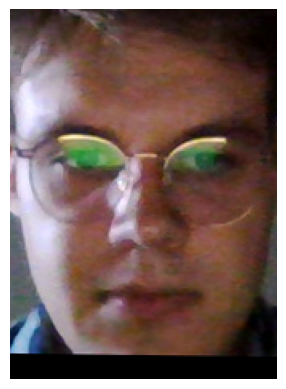

False

In [13]:

# Initialize webcam
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

if not ret:
    print("Failed to capture image")
    exit()

# Extract faces using the new function
faces = DeepFace.extract_faces(frame, detector_backend='mtcnn', enforce_detection=True)

if len(faces) == 0:
    print("No face detected")
    exit()

# Take the first detected face
cropped_face = faces[0]["face"]
cropped_face_uint8 = (cropped_face * 255).astype(np.uint8)
# Show the cropped face
plt.imshow(cropped_face)
plt.axis('off')
plt.show()

# Optionally save it
# import cv2
cv2.imwrite("data/target_person/cropped_face.jpg", cv2.cvtColor(cropped_face_uint8, cv2.COLOR_RGB2BGR))


In [18]:


# Initialize webcam
cap = cv2.VideoCapture(0)
frame_count = 0
detected_faces = []
faces = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_count += 1
    # Extract faces
    try:
        if frame_count % 3 == 0:
            faces = DeepFace.extract_faces(frame, detector_backend='mtcnn', enforce_detection=False)
            detected_faces.append(faces)
    except:
        faces = []

    # Draw rectangles for each detected face
    for face_data in faces:
        facial_area = face_data["facial_area"]
        x, y, w, h = facial_area["x"], facial_area["y"], facial_area["w"], facial_area["h"]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, "Osoba", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.8, (0, 255, 0), 2, cv2.LINE_AA)
   
   
    
    # Show the webcam feed
    cv2.imshow("Webcam Face Detection", frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# detected_faces = []
cap.release()
cv2.destroyAllWindows()

In [20]:
for i, faces in enumerate(detected_faces):
    cropped_face = faces[0]["face"]
    cropped_face_uint8 = (cropped_face * 255).astype(np.uint8)
    cv2.imwrite(f"data/test/non_target_person/cropped_face_mateusz{i}.jpg", cv2.cvtColor(cropped_face_uint8, cv2.COLOR_RGB2BGR))

In [21]:
len(detected_faces)

150

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace

In [23]:


# Input and output dirs
input_dir = "data/random_people"       # where your raw images are
output_dir = "data/train/non_target_person"   # where cropped faces will be saved
os.makedirs(output_dir, exist_ok=True)
MAX_DIM = 1024  # maximum width or height to prevent memory issues

for fname in os.listdir(input_dir):
    if not fname.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(input_dir, fname)
    img = cv2.imread(img_path)

    if img is None:
        print(f"⚠️ Could not read {img_path}")
        continue

    # Resize to max dimension while keeping aspect ratio
    h, w = img.shape[:2]
    scale = MAX_DIM / max(h, w) if max(h, w) > MAX_DIM else 1
    if scale < 1:
        img = cv2.resize(img, (int(w*scale), int(h*scale)))

    try:
        faces = DeepFace.extract_faces(img, detector_backend="mtcnn", enforce_detection=False)
    except Exception as e:
        print(f"Error extracting from {fname}: {e}")
        continue

    if len(faces) == 0:
        print(f"❌ No face found in {fname}")
        continue

    cropped_face = faces[0]["face"]
    cropped_face_uint8 = (cropped_face * 255).astype(np.uint8)

    save_path = os.path.join(output_dir, f"target_{fname}")
    cv2.imwrite(save_path, cv2.cvtColor(cropped_face_uint8, cv2.COLOR_RGB2BGR))
    print(f"✅ Saved {save_path}")

✅ Saved data/train/non_target_person\target_01274.png
✅ Saved data/train/non_target_person\target_01275.png
✅ Saved data/train/non_target_person\target_01276.png
✅ Saved data/train/non_target_person\target_01277.png
✅ Saved data/train/non_target_person\target_01278.png
✅ Saved data/train/non_target_person\target_01279.png
✅ Saved data/train/non_target_person\target_01280.png
✅ Saved data/train/non_target_person\target_01281.png
✅ Saved data/train/non_target_person\target_01282.png
✅ Saved data/train/non_target_person\target_01283.png
✅ Saved data/train/non_target_person\target_01284.png
✅ Saved data/train/non_target_person\target_01285.png
✅ Saved data/train/non_target_person\target_01286.png
✅ Saved data/train/non_target_person\target_01287.png
✅ Saved data/train/non_target_person\target_01288.png
✅ Saved data/train/non_target_person\target_01289.png
✅ Saved data/train/non_target_person\target_01290.png
✅ Saved data/train/non_target_person\target_01291.png
✅ Saved data/train/non_targe

In [22]:
import os
import random
import shutil

def move_random_files(src_dir, dst_dir, sample_size):
    # make sure destination exists
    os.makedirs(dst_dir, exist_ok=True)

    # list all files in source
    files = [f for f in os.listdir(src_dir) if os.path.isfile(os.path.join(src_dir, f))]

    if sample_size > len(files):
        raise ValueError(f"Sample size {sample_size} is larger than number of files {len(files)}")

    # take random sample
    sampled_files = random.sample(files, sample_size)

    # move sampled files
    for f in sampled_files:
        shutil.move(os.path.join(src_dir, f), os.path.join(dst_dir, f))

    print(f"Moved {len(sampled_files)} files to {dst_dir}")

# Example usage
src = r"data/train/target_person"
dst = r"data/val/target_person"
n = 140   # number of files to move
move_random_files(src, dst, n)


Moved 140 files to data/val/target_person
